3장 스포츠센터의 인원수에대한 

고객의 전체 모습을 파악할건데 

1. use_log.csv 센터의 이용 이력 데이터 

2. customer_master.csv => 2019년 3월 말 시점의 회원 데이터

3. class_master.csv 회원 구분 데이터( 종일 주간 야간)

4. campaign_master.csv 행사 구분 데이터( 입회비 유무)



-----------------------------------------------------------------

## 전체적인 데이터를 한 눈에 보았을 때 

1. 2018년 4월1일부터 2019년 3월31일까지 회원의 데이터를 분석하는 것이다. 
그러면 회원권이 끝난 사람, 지속적으로 이용하는 사람을 구별하고 

2. campaign 데이터를 확인하고 입회비가 있는지,없는지 구별

3. 어떤 회원들이 어떤 캠페인으로 이용하고있는지 

4. 삭제된 회원들의 수를 분류하고 거기서 어떤 캠페인에 참여하는 사람들의 회원들을 분류 시켜보고

5. 남아있는 회원들은 어떤 캠페인으로 이용하고 있을까?

6. 어떤 종일 , 야간, 주간의 클래스도 확인

In [327]:
# 경고(warnimg) 표시 무시

import warnings
warnings.filterwarnings('ignore')

In [328]:
import pandas as pd
import numpy as np

uselog = pd.read_csv("use_log.csv")
uselog

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [329]:
customer_master = pd.read_csv("customer_master.csv")

In [330]:
customer_master

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0
...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0


In [331]:
customer_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  4192 non-null   object
 1   name         4192 non-null   object
 2   class        4192 non-null   object
 3   gender       4192 non-null   object
 4   start_date   4192 non-null   object
 5   end_date     1350 non-null   object
 6   campaign_id  4192 non-null   object
 7   is_deleted   4192 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 262.1+ KB


In [332]:
class_master = pd.read_csv("class_master.csv")

In [333]:
class_master

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [334]:
campaign_master = pd.read_csv("campaign_master.csv")

In [335]:
campaign_master

,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [336]:
# 데이터 합쳐주기

customer_join = pd.merge(customer_master
                      , class_master
                      , left_on = "class"
                      , right_on = "class"
                      , how = "left")
customer_join = pd.merge(customer_join
                         , campaign_master
                         , left_on = "campaign_id"
                         , right_on = "campaign_id"
                         , how = "left")
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반


In [337]:
# 회원권이 끝난 사람들의 데이터

end_customer = customer_join[customer_join["end_date"].notnull()]
end_customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
708,TS511179,XXXXXX,C01,F,2016-05-01 00:00:00,2018-04-30 00:00:00,CA1,1,0_종일,10500,2_일반
729,TS443736,XXXX,C02,M,2016-05-01 00:00:00,2018-04-30 00:00:00,CA1,1,1_주간,7500,2_일반
730,HD542886,XX,C01,M,2016-05-01 00:00:00,2018-04-30 00:00:00,CA1,1,0_종일,10500,2_일반
770,HD597545,XXXXX,C03,F,2016-06-01 00:00:00,2018-05-31 00:00:00,CA1,1,2_야간,6000,2_일반
785,HI749296,XXXXX,C01,M,2016-06-01 00:00:00,2018-05-31 00:00:00,CA1,1,0_종일,10500,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4049,OA143589,XXXXX,C03,F,2019-01-15 00:00:00,2019-02-28 00:00:00,CA1,1,2_야간,6000,2_일반
4050,GD367382,XXXX,C01,M,2019-01-15 00:00:00,2019-03-31 00:00:00,CA1,1,0_종일,10500,2_일반
4068,OA034442,XXXXX,C02,M,2019-02-05 00:00:00,2019-03-31 00:00:00,CA1,1,1_주간,7500,2_일반
4086,PL508278,XXXXX,C03,M,2019-02-09 00:00:00,2019-03-31 00:00:00,CA1,1,2_야간,6000,2_일반


# 고객 데이터 집계
클래스 별로 이미 탈퇴했는지 안했는지 여부 집계하여 전체적인 숫자 파악 

In [338]:
class_group = customer_join.groupby("class_name").count()["is_deleted"]
class_group 

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: is_deleted, dtype: int64

캠페인 별로 이미 탈퇴했는지 안했는지 여부 집계하여 전체적인 숫자 파악 

In [339]:
campaign_group = customer_join.groupby("campaign_name").count()["is_deleted"]
campaign_group 

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: is_deleted, dtype: int64

성별 별로 이미 탈퇴했는지 안했는지 여부 집계

In [340]:
gender_group = customer_join.groupby("gender").count()["is_deleted"]
gender_group

gender
F    1983
M    2209
Name: is_deleted, dtype: int64

삭제된 인원과 남아있는 인원 집계

In [341]:
# '0'일 경우 -> 남아있는 사람 '1'일 경우 -> 삭제된 회원 

remain_group = customer_join.groupby("is_deleted").count()["customer_id"]
remain_group

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

## 2018.04.01~ 2019.03.31 가입인원 구하기

In [342]:
from datetime import timedelta, datetime
import datetime

customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])

start_date = customer_join.loc[customer_join["start_date"] >  pd.to_datetime("20180331")]

start_date

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
2816,PL995085,XXXXXX,C01,M,2018-04-01,2018-08-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2817,PL320453,XXX,C01,M,2018-04-01,2018-10-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2818,AS823436,XXXXX,C01,F,2018-04-01,2018-12-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2819,TS894938,XXXXXX,C01,M,2018-04-01,2019-02-28 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2820,HI697849,XXXXX,C03,M,2018-04-01,2018-07-31 00:00:00,CA3,1,2_야간,6000,1_입회비무료
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반


In [343]:
customer_join["end_date"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4187    NaN
4188    NaN
4189    NaN
4190    NaN
4191    NaN
Name: end_date, Length: 4192, dtype: object

2019.04.01까지의 회원 데이터

In [344]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])

In [345]:
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime('20190331'))|(customer_join["end_date"].isna())]

customer_newer["end_date"].unique()

array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [346]:
customer_join["end_date"].isna()

0       True
1       True
2       True
3       True
4       True
        ... 
4187    True
4188    True
4189    True
4190    True
4191    True
Name: end_date, Length: 4192, dtype: bool

In [347]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [348]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [349]:
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

* "uselog"dataframe의 customer의 달마다 이용횟수를 구함  

In [350]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])

# "uselog"데이터프레임에 "연월" column 추가 
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")

# "as_index=False"를 할 경우 인덱스 사용 X 
uselog_months = uselog.groupby(["연월", "customer_id"], as_index = False).count()

# "log_id" -> "count"로 바뀜
uselog_months.rename(columns = {"log_id" : "count"}, inplace = True)

# "uselog_months"데이터프레임의 "usedate" column 삭제 
del uselog_months["usedate"]

uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [351]:
uselog_months

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [352]:
# agg함수 : 여러개의 함수를 여러 열에 적용
uselog_customer = uselog_months.groupby("customer_id").agg(['mean', 'median', 'max', 'min'])['count']

# index값 "ustomer_id" -> index(0~)으로 초기화  
uselog_customer = uselog_customer.reset_index(drop = False)

uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [353]:
# "uselog" 데이터프레임에 주말값을 추가해줌
uselog["weekday"] = uselog["usedate"].dt.weekday

uselog_weekday = uselog.groupby(["customer_id", "연월","weekday"], as_index = False).count()[['customer_id', '연월','weekday','log_id']]

uselog_weekday.rename(columns= {'log_id':'count'}, inplace= True)

uselog_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [354]:
uselog_weekday = uselog_weekday.groupby("customer_id", as_index=False).max()[['customer_id','count']]

uselog_weekday["routine_flg"] = 0

uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"] < 4, 1)

uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [355]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how ='left')

customer_join = pd.merge(customer_join, uselog_weekday[['customer_id','routine_flg']], on = "customer_id", how="left")

customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0


In [356]:
# 결측치 확인
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

# 회원 기간을 계산
회원 기간은 단순하게 start_date와 end_date 차이다. 다만 19년 3월까지 탈퇴하지않은 회원은 end_date에 결측치가 있기 때문에 그 차이를 계
산할 수 없다. 그래서 회원은 19년 4월 30일로 채워서 회원기간을 계산한다. 19년 3월31일까지 계산할 경우 실제로 3월31일에 탈회한사람과
구별할 수 없다. from dateutil.relativedelta import relativedelta

In [357]:
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]

customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))

customer_join["membership_period"] = 0

for i in range(len(customer_join)):
    delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] =delta.years*12 + delta.months
    
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30,1


In [358]:
customer_join[["mean",'median','max','min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [359]:
customer_join.groupby("routine_flg").count()["customer_id"]
# 정기적으로 이용하는 회원의 수 3413

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

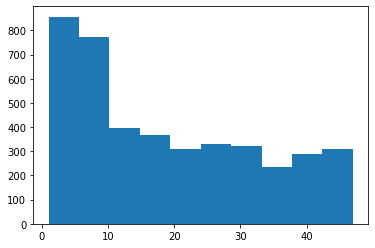

In [360]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

In [361]:
customer_end = customer_join.loc[customer_join["is_deleted"] == 1]
customer_end

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
708,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,0_종일,10500,2_일반,3.0,3.0,3,3,0,2018-04-30,23
729,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,1_주간,7500,2_일반,3.0,3.0,3,3,0,2018-04-30,23
730,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,0_종일,10500,2_일반,1.0,1.0,1,1,0,2018-04-30,23
770,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,2_야간,6000,2_일반,3.5,3.5,4,3,1,2018-05-31,23
785,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,0_종일,10500,2_일반,3.0,3.0,3,3,0,2018-05-31,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,OA143589,XXXXX,C03,F,2019-01-15,2019-02-28,CA1,1,2_야간,6000,2_일반,4.5,4.5,6,3,0,2019-02-28,1
4050,GD367382,XXXX,C01,M,2019-01-15,2019-03-31,CA1,1,0_종일,10500,2_일반,7.0,6.0,12,3,0,2019-03-31,2
4068,OA034442,XXXXX,C02,M,2019-02-05,2019-03-31,CA1,1,1_주간,7500,2_일반,7.0,7.0,11,3,0,2019-03-31,1
4086,PL508278,XXXXX,C03,M,2019-02-09,2019-03-31,CA1,1,2_야간,6000,2_일반,7.0,7.0,10,4,0,2019-03-31,1


In [362]:
customer_stay = customer_join.loc[customer_join["is_deleted"]== 0]
customer_stay

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30,1


In [363]:
customer_join.to_csv('customer_join.csv', index=False)